<a href="https://colab.research.google.com/github/Alevtina529/test/blob/main/Project_4_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Проект: классификация

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

## Часть 1. Знакомство с данными, обработка пропусков и выбросов

### Задание 1

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cvs_f='/content/drive/MyDrive/Colab/dataset/bank_fin.csv'
df = pd.read_csv(cvs_f, sep = ';')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,"2 343,00 $",yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,"45,00 $",no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,"1 270,00 $",yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,"2 476,00 $",yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,"184,00 $",no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
# исследуйте данные на предмет пропусков. Где есть пропущенные значения? Сколько их?
# ваш код

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11137 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(6), object(11)
memory usage: 1.4+ MB


### Задание 2

In [ ]:
# есть ли в признаке job пропущенные значения? Возможно, они обозначены каким-то специальным словом?
# ваш код

In [6]:
df['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

### Задание 3

In [ ]:
# преобразуйте признак balance таким образом, чтобы он корректно считывался, как вещественное число (float)

In [7]:
def make_convert(row):
    row = str(row)
    if row != 'unknown':
        row = row.replace(',00', '')
        row = row.replace('$', '')
        row = row.replace(' ', '')
        return float(row)
    else:
        return np.nan
df['balance'] = df['balance'].apply(make_convert)
df['balance'].mean()


1529.1290293615875

### Задание 4

In [ ]:
# обработайте пропуски в признаки balance , заменив их на медианные значения по данному признаку
# ваш код

In [8]:
cols_null_percent = df.isnull().mean() *100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

balance    0.223974
dtype: float64

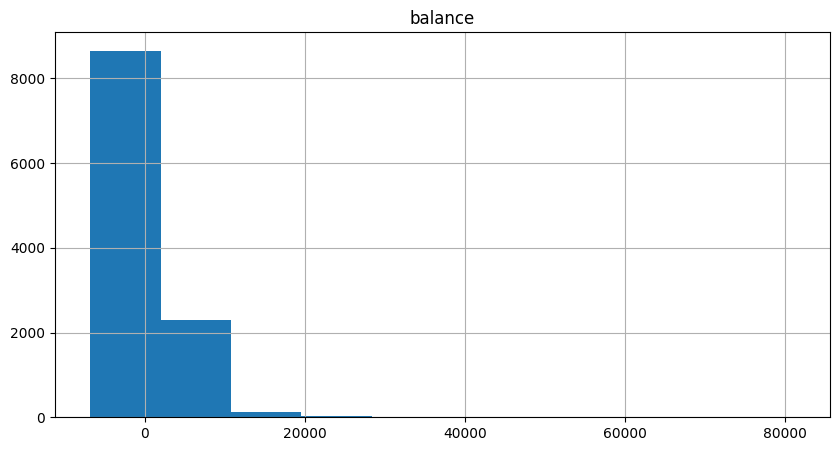

In [9]:
cols = cols_with_null.index
df[cols].hist(figsize=(10, 5));

In [11]:
med=df['balance'].median()

In [12]:
df['balance']=df['balance'].fillna(med)

In [13]:
df['balance'].mean()

1526.9360329690019

### Задание 5

In [ ]:
# обработайте пропуски в категориальных признаках: job и education, заменив их на модальные значения
# ваш код

In [14]:
m_job = df['job'].mode()[0]
df['job'] = df['job'].apply(lambda x: m_job if x == 'unknown' else x)


In [15]:
m_education = df['education'].mode()[0]
df['education'] = df['education'].apply(lambda x: m_education if x == 'unknown' else x)

In [16]:
df['education'].value_counts()

secondary    5973
tertiary     3689
primary      1500
Name: education, dtype: int64

In [17]:
df['job'].value_counts()

management       2636
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
Name: job, dtype: int64

In [18]:
# фильтрация и средний баланс
df_bal=df[(df.job =='management') & (df.education =='secondary')]
display(round(df_bal['balance'].mean(),3))

1598.883

### Задание 6

In [ ]:
# удалите все выбросы для признака balance
# ваш код

In [19]:
df['balance'].describe()

count    11162.000000
mean      1526.936033
std       3224.829691
min      -6847.000000
25%        123.000000
50%        550.000000
75%       1699.000000
max      81204.000000
Name: balance, dtype: float64

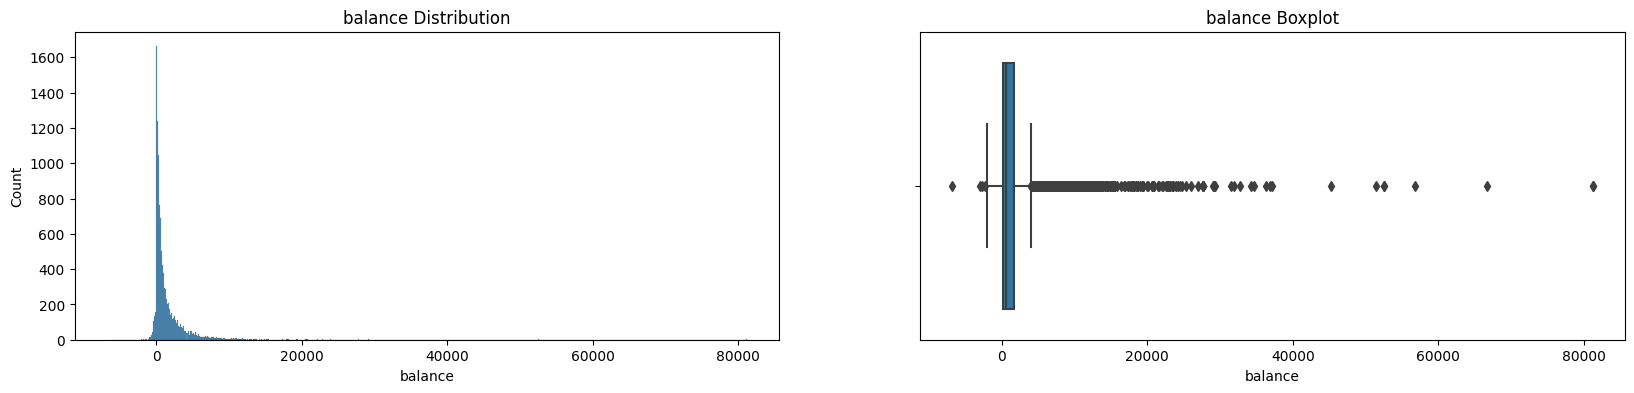

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))
histplot = sns.histplot(data=df, x='balance', ax=axes[0]);
histplot.set_title('balance Distribution');
boxplot = sns.boxplot(data=df, x='balance', ax=axes[1]);
boxplot.set_title('balance Boxplot');

In [21]:
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

In [22]:
outliers, cleaned = outliers_iqr(df, 'balance')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 1057
Результирующее число записей: 10105


In [23]:
x = df['balance']
quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
iqr = quartile_3 - quartile_1
lower_bound = quartile_1 - (iqr * 1.5)
upper_bound = quartile_3 + (iqr * 1.5)
print(lower_bound,upper_bound)

-2241.0 4063.0


## Часть 2:  Разведывательный анализ

### Задание 1

In [ ]:
# изучите соотношение классов в ваших данных на предмет несбалансированности, проиллюстрируйте результат
# ваш код

In [24]:
df['deposit'].describe()

count     11162
unique        2
top          no
freq       5873
Name: deposit, dtype: object

In [25]:
df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

<Axes: xlabel='deposit', ylabel='count'>

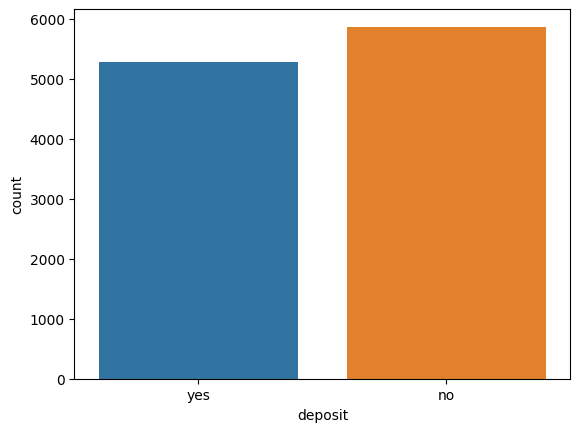

In [26]:
sns.countplot(x=df["deposit"])

### Задания 2 и 3

In [ ]:
#рассчитайте описательные статистики для количественных переменных, проинтерпретируйте результат
#ваш код

In [27]:
df['age'].describe() # максимальный возраст клиента

count    11162.000000
mean        41.231948
std         11.913369
min         18.000000
25%         32.000000
50%         39.000000
75%         49.000000
max         95.000000
Name: age, dtype: float64

In [28]:
df['duration'].describe() # минимальная продолжительность разговора с клиентом банка

count    11162.000000
mean       371.993818
std        347.128386
min          2.000000
25%        138.000000
50%        255.000000
75%        496.000000
max       3881.000000
Name: duration, dtype: float64

### Задания 4 и 5

In [ ]:
#рассчитайте описательные статистики для категориальных переменных, проинтерпретируйте результат
#ваш код
#постройте визуализации, иллюстрирующие результаты

In [29]:
df['month'].describe(include = 'object') # Сколько было месяцев, в которых проводилась маркетинговая кампания

count     11162
unique       12
top         may
freq       2824
Name: month, dtype: object

<Axes: xlabel='month', ylabel='count'>

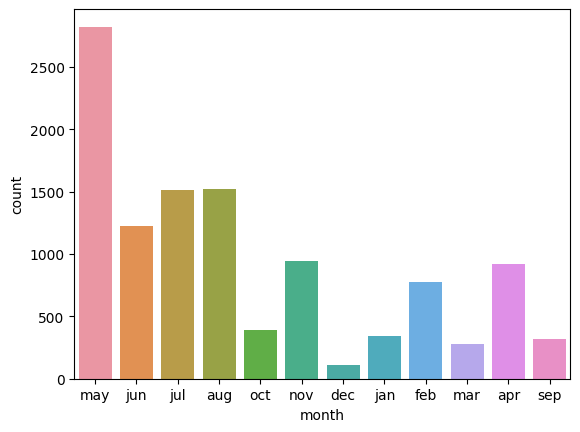

In [30]:
sns.countplot(x=df["month"])

In [31]:
# Сколько сфер занятости представлено среди клиентов банка
df['job'].describe()

count          11162
unique            11
top       management
freq            2636
Name: job, dtype: object

### Задание 6

In [ ]:
# Узнайте, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.
# ваш код

<Axes: xlabel='poutcome'>

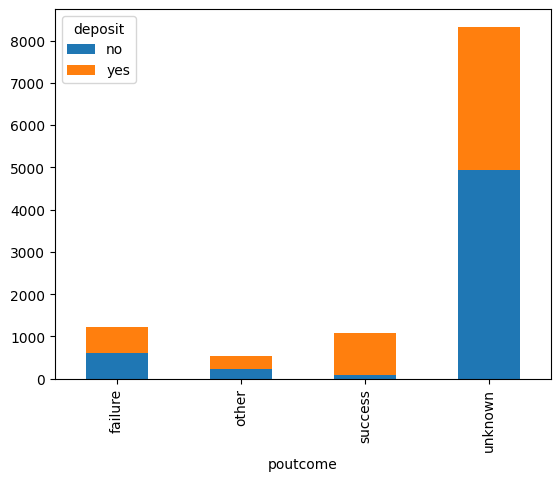

In [32]:
types=df.groupby('poutcome')['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

### Задание 7

In [ ]:
# узнайте, в каком месяце чаще всего отказывались от предложения открыть депозит
# ваш код

In [45]:
res_no = df[df.deposit == 'no'].groupby(['month'])['deposit'].count()
res_all = df.groupby(['month'])['deposit'].count()

print(res_no/res_all)

month
apr    0.374865
aug    0.547070
dec    0.090909
feb    0.431701
jan    0.587209
jul    0.585865
jun    0.553191
mar    0.101449
may    0.672450
nov    0.572641
oct    0.176020
sep    0.156740
Name: deposit, dtype: float64


### Задание 8

In [ ]:
# создайте возрастные группы и определите, в каких группах более склонны открывать депозит, чем отказываться от предложения

<Axes: xlabel='age_group', ylabel='count'>

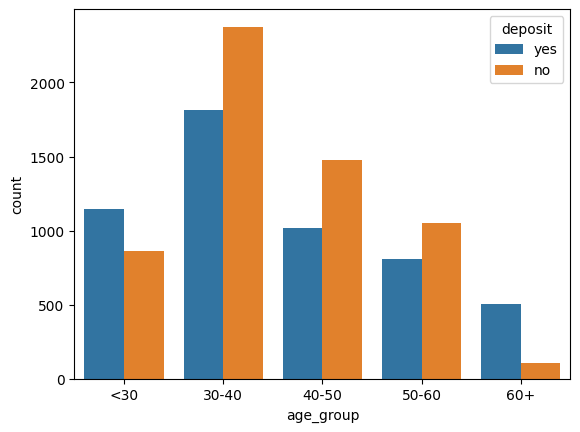

In [34]:
df['age_group']=pd.cut(df.age,[0,30,40,50,60,9999],labels=['<30','30-40','40-50','50-60','60+'])
sns.countplot(x='age_group',hue='deposit',data=df)

### Задания 9 и 10

In [ ]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от семейного статуса

<Axes: xlabel='marital', ylabel='count'>

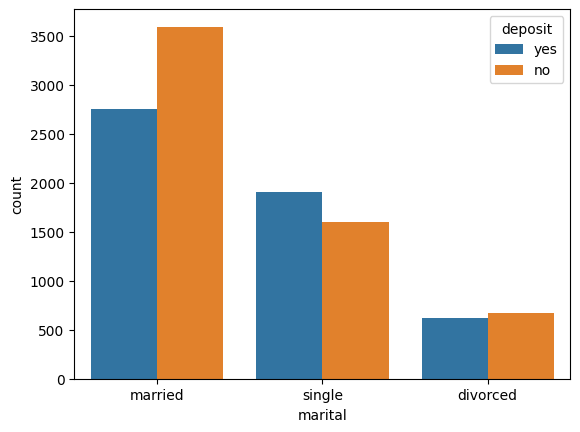

In [35]:
sns.countplot(x='marital',hue='deposit',data=df)

In [ ]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от образования

<Axes: xlabel='education', ylabel='count'>

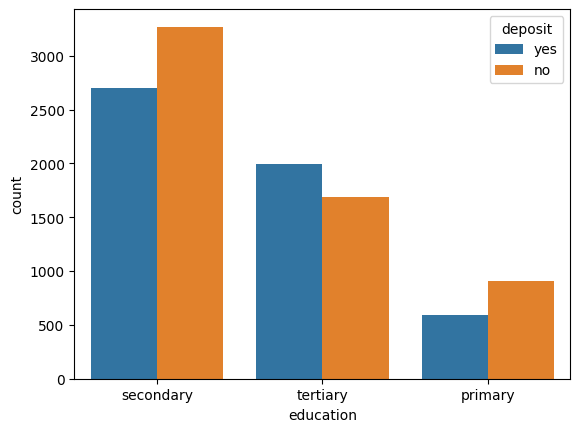

In [36]:
sns.countplot(x='education',hue='deposit',data=df)

In [ ]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от вида профессиональной занятости

<Axes: xlabel='job', ylabel='count'>

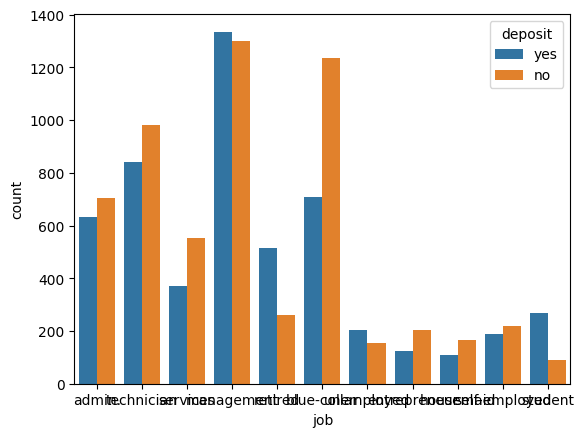

In [37]:
sns.countplot(x='job',hue='deposit',data=df,)

### Задание 11

In [ ]:
# постройте сводную таблицу, чтобы определить люди с каким образованием и семейным статусом наиболее многочисленны
#(если рассматривать тех, кто открыл депозит)

marital    divorced  married  single
education                           
primary         104      396      91
secondary       315     1446     941
tertiary        203      913     880 marital    divorced  married  single
education                           
primary         100      703     106
secondary       388     1963     920
tertiary        183      930     580


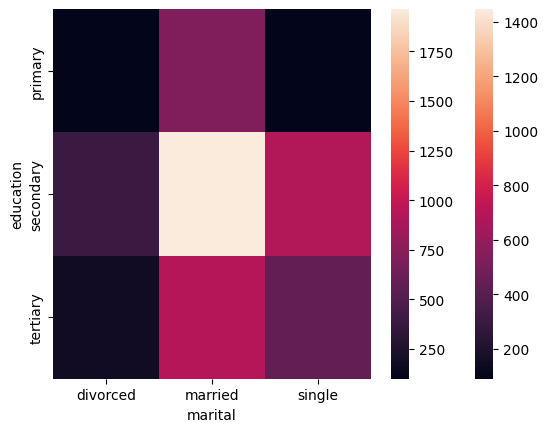

In [42]:
data_yes = df[df.deposit == 'yes'][['education','marital','deposit']]
data_no = df[df.deposit == 'no'][['education','marital','deposit']]
res1 = pd.crosstab(data_yes['education'], data_yes['marital'])
res2 = pd.crosstab(data_no['education'], data_no['marital'])
data_y = data_yes.groupby(['education', 'marital'])['deposit'].count().unstack()
data_n = data_no.groupby(['education', 'marital'])['deposit'].count().unstack()
sns.heatmap(data_y)
sns.heatmap(data_n)
print(res1,res2)

## Часть 3: преобразование данных

### Задание 1

In [ ]:
# преобразуйте уровни образования

In [ ]:

lab_enc=LabelEncoder() # Создание экземпляра класса LabelEncoder()

# Кодирование признака
df['education']=lab_enc.fit_transform(df['education'])

df['education'].sum()

13351

### Задания 2 и 3

In [ ]:
# преобразуйте бинарные переменные в представление из нулей и единиц

### Задание 4

In [ ]:
# создайте дамми-переменные

### Задания 5 и 6

In [ ]:
# постройте корреляционную матрицу и оцените данные на предмет наличия мультиколлинеарности

### Задания 7 и 8

In [ ]:
X = df.drop(['deposit'], axis=1)
y = df['deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)


In [ ]:
# рассчитайте необходимые показатели

### Задание 9

In [ ]:
# с помощью SelectKBest отберите 15 наиболее подходящих признаков

### Задание 10

In [ ]:
# нормализуйте данные с помощью minmaxsxaler

# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [ ]:
# обучите логистическую регрессию и рассчитайте метрики качества

### Задания 2,3,4

In [ ]:
# обучите решающие деревья, настройте максимальную глубину

### Задание 5

In [ ]:
# подберите оптимальные параметры с помощью gridsearch

# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

### Задание 1

In [ ]:
# обучите на ваших данных случайный лес

### Задания 2 и 3

In [ ]:
# используйте для классификации градиентный бустинг и сравните качество со случайным лесом

In [46]:
y_train_pred = rf.predict(X_train_scaled)
print('Train: {:.2f}'.format(metrics.accuracy_score(y_train, y_train_pred)))
y_test_pred = rf.predict(X_test_scaled)
print('Test accuracy: {:.2f}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print()
print('Train: {:.2f}'.format(metrics.recall_score(y_train, y_train_pred)))
print('Test recall: {:.2f}'.format(metrics.recall_score(y_test, y_test_pred)))

NameError: ignored

### Задание 4

In [ ]:
# объедините уже известные вам алгоритмы с помощью стекинга

### Задание 5

In [ ]:
# оцените, какие признаки демонстрируют наибольшую  важность в модели градиентного бустинга

### Задания 6,7,8

In [ ]:
# реализуйте оптимизацию гиперпараметров с помощью Optuna